In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

path_2022 = '../data/2022/'
path = '../data/'

In [3]:
svod_shop = pd.read_csv(path_2022+'svod_shop.csv', sep=';')
svod_shop = svod_shop.rename(columns={'Unnamed: 0': 'id_tt'})
svod_shop = svod_shop.set_index('id_tt')

In [4]:
svod_shop

,population,count_shops,shop_list,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,...,5_mean,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6
id_tt,,,,,,,,,,,,,,,,,,,,,
10864,3100.00,7.00,"Eurospar,Дикси,Азбука вкуса,Азбука daily,ВкусВ...","Москва проспект Мира, д. 116",55.81,37.64,113.40,Алексеевский,4,6,...,363548.37,84176.01,9392144.77,347857.21,73270.76,0,6.88,2.08,-13.59,-4.32
11127,2418.00,4.00,"Перекрёсток,Перекрёсток,Продуктовый магазин,Фе...","Москва ул. Пришвина, д. 26",55.88,37.60,105.80,Бибирево,4,5,...,274435.44,33040.23,7232107.73,267855.84,33553.55,0,4.12,-0.08,-5.97,-2.40
11128,5332.00,9.00,"Супер Лента,Перекрёсток,Пятёрочка,Перекрёсток,...","Москва ул. Широкая, д. 12",55.89,37.66,127.70,Медведково Северное,5,6,...,319327.13,52918.08,8385541.39,310575.61,44590.27,0,-0.52,6.74,-5.70,-2.74
11160,4712.00,5.00,"Перекрёсток,Пятёрочка,Пятёрочка,Продуктовый ма...","Москва Ярославское шоссе, д. 2, корп. 2",55.85,37.68,142.10,Ярославский,4,5,...,309121.44,43595.77,8044286.09,297936.52,42347.81,0,-0.36,4.31,-4.62,-3.62
11178,4402.00,5.00,"Перекрёсток,Пятёрочка,Авокадо,Первым делом,Ори...",Москва ул. Снежная 21,55.85,37.65,124.10,Свиблово,5,6,...,410304.81,63670.52,10734064.44,397557.94,55390.64,0,0.36,-0.69,-3.46,-3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,2449.00,NaN,NaN,"Москва ул. Руставели, д. 6 к. 6",55.81,37.59,138.70,Бутырский,3,5,...,181001.08,30196.87,4998632.96,185134.55,26576.07,0,2.89,3.03,-7.12,2.28
12348,3007.00,NaN,NaN,"Москва ул. Тайнинская, д. 16, к. 1",55.88,37.68,94.60,Лосиноостровский,2,4,...,161338.61,17868.09,4097123.24,151745.31,13679.32,0,-0.02,6.07,2.58,-5.95
14125,2170.00,NaN,NaN,"Москва ул. Сухонская, д. 15 стр. 2",55.88,37.66,108.00,Медведково Северное,2,3,...,144568.77,16987.43,3500826.27,129660.23,12258.33,0,-5.47,5.17,1.71,-10.31


In [5]:
# чтоб всегда выручка росла - такого нет вообще
svod_shop[(svod_shop['прирост_сред_3'] >= 0) &
          (svod_shop['прирост_сред_4'] >= 0) &
          (svod_shop['прирост_сред_5'] >= 0) &
          (svod_shop['прирост_сред_6'] >= 0)]

,population,count_shops,shop_list,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,...,5_mean,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6
id_tt,,,,,,,,,,,,,,,,,,,,,


In [6]:
# чтоб всегда выручка падада - 2 магазина 11732 и 13779
svod_shop[(svod_shop['прирост_сред_3'] <= 0) &
          (svod_shop['прирост_сред_4'] <= 0) &
          (svod_shop['прирост_сред_5'] <= 0) &
          (svod_shop['прирост_сред_6'] <= 0)]

,population,count_shops,shop_list,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,...,5_mean,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6
id_tt,,,,,,,,,,,,,,,,,,,,,
11732,2542.00,1.00,Пятёрочка,Москва ул. Декабристов 35 г стр 1,55.86,37.61,115.50,Отрадное,4,5,...,362134.52,54443.17,8963840.53,331994.09,39511.97,0,-0.60,-0.80,-0.62,-8.32
13779,1271.00,NaN,NaN,"Москва пр. Рижский, д. 7",55.81,37.66,48.90,Алексеевский,2,3,...,120350.31,17416.42,3127238.94,115823.66,14845.17,0,-1.71,-1.60,-2.73,-3.76


In [7]:
svod_shop['прирост_за_4мес'] = (svod_shop['прирост_сред_3'] + svod_shop['прирост_сред_4']+ \
                                svod_shop['прирост_сред_5'] + svod_shop['прирост_сред_6'])

In [8]:
svod_shop = svod_shop.sort_values(by = 'прирост_за_4мес', ascending=False) 

In [9]:
svod_shop 

,population,count_shops,shop_list,adress,Shirota,Dolgota,ploshad,Район,shtat,qty_kassa,...,5_std,6_sum,6_mean,6_std,start_2,прирост_сред_3,прирост_сред_4,прирост_сред_5,прирост_сред_6,прирост_за_4мес
id_tt,,,,,,,,,,,,,,,,,,,,,
14859,4898.00,4.00,"Мини Лента,Пятёрочка,Мираторг,Мини Лента","Москва ул. Новодмитровская, д. 2 к. 4",55.80,37.59,112.50,Бутырский,4,6,...,63145.50,8390596.18,310762.82,58285.47,0,5.84,7.11,-1.55,5.08,16.48
14332,2015.00,8.00,"Бристоль,Вино и еда,Мандарин,Гастроном,Продукт...","Москва ул. Бутырская, д. 2/18",55.79,37.59,233.00,Бутырский,9,9,...,239438.26,20995357.03,777605.82,209489.15,0,11.54,5.87,-7.70,6.13,15.83
11471,3906.00,3.00,"Гастроном №1,Гурман 17.1,Лоза",Москва Ботаническая 19,55.83,37.60,149.60,Марфино,4,7,...,42058.90,10021795.54,371177.61,32868.90,0,-1.55,7.43,7.28,0.11,13.27
14330,4867.00,5.00,"Перекрёсток,Мираторг,Верный,ВкусВилл айс,Ранай","Москва пр. Лазоревый, д. 1А, к. 2 + ""ВкусВиллАйс""",55.85,37.64,339.80,Свиблово,10,10,...,90239.76,27785626.91,1029097.29,71585.99,0,2.41,3.91,-0.65,1.26,6.92
11911,744.00,3.00,"Магнит,Калинка,Кулинария","Москва ул. Ботаническая, д. 27",55.83,37.60,186.50,Марфино,4,6,...,37898.61,6993915.94,259033.92,41422.07,0,4.70,2.28,0.73,-1.88,5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,3565.00,NaN,NaN,"Москва ул. Широкая, д. 1 к. 1",55.89,37.65,78.20,Медведково Северное,2,3,...,19539.45,3161911.81,117107.84,15806.53,0,2.26,-1.83,-5.33,-9.72,-14.63
14343,3441.00,3.00,"Eurospar,Пятёрочка,Мини-маркет","Москва ш. Ярославское, д. 122 к. 1",55.87,37.71,155.80,Ярославский,3,9,...,39736.34,10617475.51,393239.83,39230.83,0,0.33,0.47,-2.61,-13.90,-15.71
12015,2418.00,3.00,"Пятёрочка,ИМПЕРИАЛ,Продуктовый магазин","Москва пр. Шокальского, д. 2",55.87,37.65,188.20,Медведково Южное,4,5,...,32751.23,5968800.68,221066.69,30295.84,0,-4.77,1.49,-3.51,-9.73,-16.52


In [10]:
svod_shop_vv = svod_shop[svod_shop['format'] == 'ВкусВилл']
svod_shop_sh = svod_shop[svod_shop['format'] == 'Шмель']

In [11]:
raion = list(svod_shop_vv['Район'].unique())

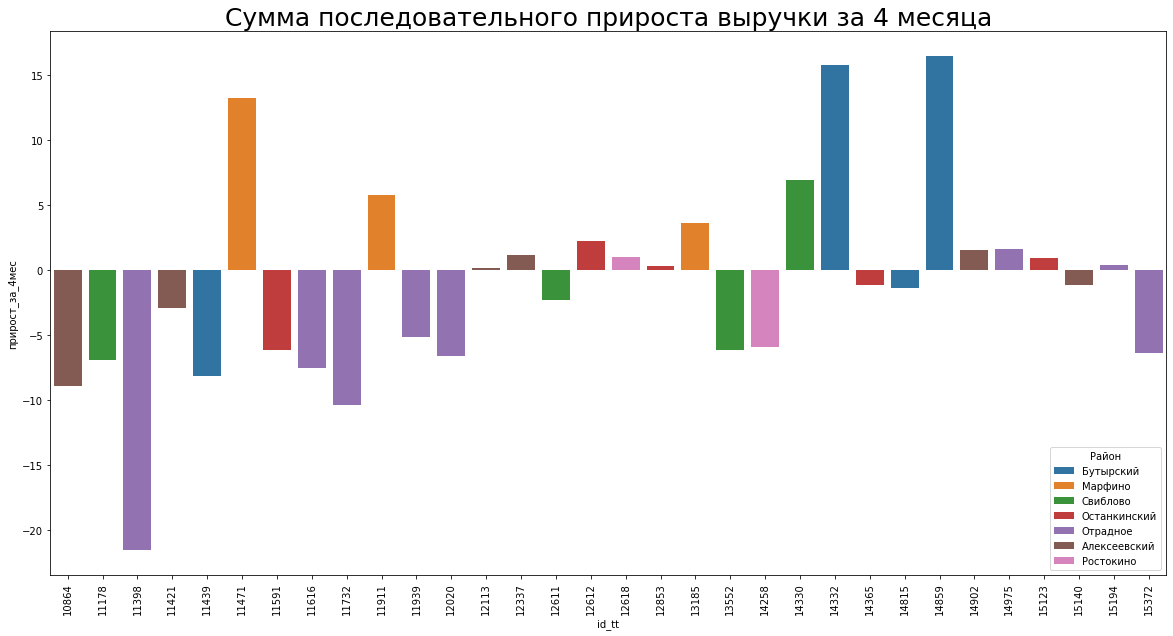

In [13]:
svod_shop_vv1 = svod_shop_vv[svod_shop_vv['Район'].isin(raion[:7])]
plt.figure(figsize=(20, 10))
plt.title('Сумма последовательного прироста выручки за 4 месяца', fontsize=25)
sns.barplot(x = svod_shop_vv1.index, y = svod_shop_vv1['прирост_за_4мес'], hue = svod_shop_vv1['Район'], dodge=False)
plt.xticks(rotation=90)
plt.show()

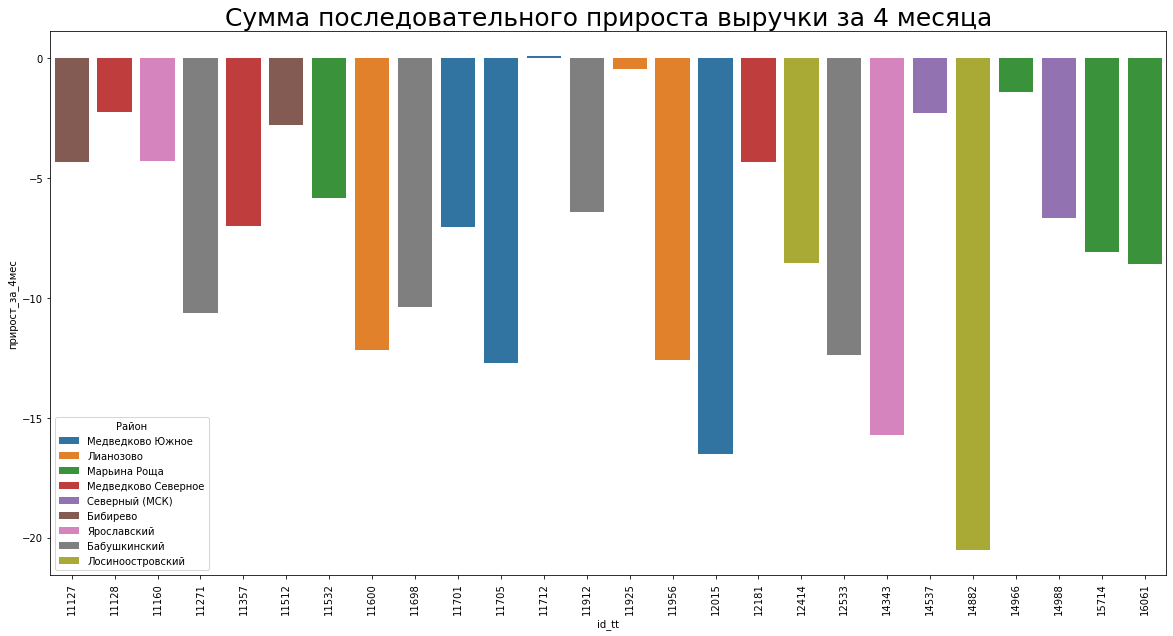

In [14]:
svod_shop_vv2 = svod_shop_vv[svod_shop_vv['Район'].isin(raion[7:])]
plt.figure(figsize=(20, 10))
plt.title('Сумма последовательного прироста выручки за 4 месяца', fontsize=25)
sns.barplot(x = svod_shop_vv2.index, y = svod_shop_vv2['прирост_за_4мес'], hue = svod_shop_vv2['Район'], dodge=False)
plt.xticks(rotation=90)
plt.show()

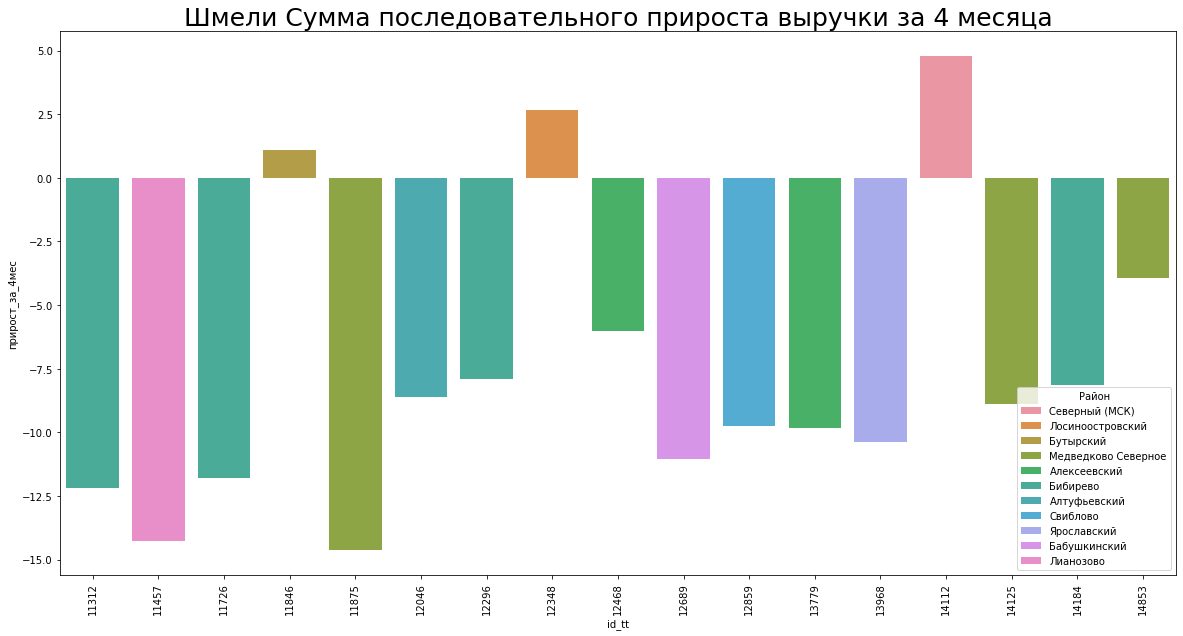

In [15]:
plt.figure(figsize=(20, 10))
plt.title('Шмели Сумма последовательного прироста выручки за 4 месяца', fontsize=25)
sns.barplot(x = svod_shop_sh.index, y = svod_shop_sh['прирост_за_4мес'], hue = svod_shop_sh['Район'], dodge=False)
plt.xticks(rotation=90)
plt.show()